In [3]:
import numpy as np
import uproot
import os.path
from subprocess import call
import matplotlib.pyplot as plt
import awkward.operations as ak

In [4]:
if not os.path.isfile('tmva_class_example.root'):
    call(['curl', '-L', '-O', 'http://root.cern.ch/files/tmva_class_example.root'])  #gets the data in case you don't have it downloaded
 
data = uproot.open('tmva_class_example.root')

Let's start by checking what objects we have in our file! 

In [3]:
data.classnames()

{'TreeS;1': 'TTree', 'TreeB;1': 'TTree'}

We can see that we have two TTree on this file, TreeS corresponds to our signal events and TreeB to our background events. Go ahead and assign each of them to a variable, you can do this by doing var=data["nameoftree"]

But what about the contents of the trees? Use the .keys() method to see all the variables in each of the trees. 

Great! Now we can finally start looking at the events themselves. The .arrays() method let's us convert a TTree into an array. By default its converted into an awkward array (good for when variables have different sizes) but you can specify the type you want with the library="" option, setting library="np" makes it a numpy array and library="pd" makes it a pandas array! You can also use the function ak.to_numpy(). to convert an awkward array into a numpy array (if possible).

If you want you can go and apply this method to the background tree with any library.

We now have access to both trees and turned them into arrays, what if we want to acess a specific variable or event? Now its trivial since we are using arrays. First lets pass the arrays into a variable for simplicity, then we can acess any variable by doing arrays.varname or arrays["varname"], for the event number we can simply put [i] to specify we want the event number i+1, like always!

Try now to print the values of var1 for all events, the values of all variables for the first 10 events and the value of var4 for the 30th event. Use the signal events for this.

Let's now plot this variables into histograms. Use plt.hist check the distributions of var1 on both signal and background. You can fiddle with the number of bins if you want a prettier looking plot. 

Now let's say we want to apply some cuts to our data. For some physics relevant reason we want only events that have positive values of var1. We can easily select this in two different ways, either using the cut functionality of the arrays() method (use .arrays(cut="condition") ) or we can apply a mask to an already built array (array[condition]).

Repeat the same plots as before but now only for events with var1>0.

For multiple conditions remember you have to do cut="(condition1) & (condition2) & etc." 

Try and select all events with var1<0 and var3>var4

But what about if you are interested in a variable thats not listed directly? You can do that with the aliases when calling .arrays!

In [5]:
TreeS=data["TreeS"]
newvar=TreeS.arrays("new",aliases={"new":"sqrt(var1**2+var2**2)"})

(array([ 658., 1501., 1642., 1104.,  607.,  294.,  125.,   54.,   12.,
           3.]),
 array([0.01593601, 0.4799633 , 0.94399059, 1.40801787, 1.87204516,
        2.33607244, 2.80009985, 3.26412702, 3.72815442, 4.19218159,
        4.65620899]),
 <BarContainer object of 10 artists>)

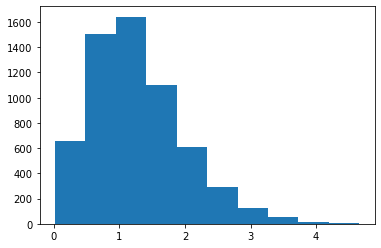

In [6]:
plt.hist(ak.to_numpy(newvar["new"]))

So now we know how to read our root files, but what about writing them? To do this we need to open a root file in a different way, let's see how.

In [8]:
file=uproot.recreate("tim.root")  #creates/opens the file we will write on

del file                          # this simply deletes the file and all its contents, this is here only in case you want a fresh file

file=uproot.recreate("tim.root")  # reopens the same file which was deleted before, if you write something you didn't want you can now just rerun this cell!

file.classnames()

{}

We can now add data to this file by assignement (think of it as a reverse of what we did at the start). Lets and add our latest histogram here.

In [9]:
file["newhist"] = np.histogram(ak.to_numpy(newvar["new"]))

In [10]:
file.classnames()

{'newhist;1': 'TH1D'}

Try now to add the histogram you made in this tutorial to this file

Adding TTrees isn't as trivial sadly and these require a bit more work, let's tree and write the TreeS (make a new branch for it for our new variable) in our file . To do this you need to create a dictionary in python for all the variables and give each key the respective array of values for all of the events. Here you can send awkward arrays without fear, no need for ak.to_numpy().